In [1]:
# Import all the libraries like numpy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Change the maximum number of rows displayed 
pd.set_option("Display.min_rows",500)
pd.set_option("Display.max_rows", 500)
pd.set_option("Display.max_column",500)

## Load the Data

In [3]:
# Read the csv file
df_loan = pd.read_csv("Loan01.csv")
print(df_loan.shape)


(39717, 111)


#### 1.1 FIX Rows - Check if there are unnecessory Rows like header and footer are present. If present delete it

In [4]:
df_loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Let's check for footer now since there are no header present 
df_loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### NOTE -  We don't have any header, footer, summary rows

In [6]:
# Drop rows with rows with columns current 
df_loan= df_loan[df_loan['loan_status']!='Current']
df_loan.shape

(38577, 111)

In [7]:
# Display the column names and data-types
df_loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan     

In [8]:
df_loan.shape

(38577, 111)

In [9]:
# Check the column name
df_loan.emp_length.isna().sum()


1033

In [10]:
# Check the columns where values are null 
df_loan.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12529
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [11]:
# Missing values in form of percentage to find total number of values missing from the column
missing_values = np.round(df_loan.isna().sum()/len(df_loan)*100,2)
missing_values

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.68
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.48
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [12]:
# Find the missing values in decending order 
missing_values.sort_values(ascending = False)

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [13]:
#identify columns with high percentage of missing values
missing_values=list(missing_values[missing_values.values>30].index)
#dropping the columns identified above
df_loan.drop(labels=missing_values,axis=1, inplace=True)
#printing the number of dropped columns
len(missing_values)

58

In [14]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [15]:
np.round(df_loan.isna().sum()/len(df_loan)*100,2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.68
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [16]:
# Check the columns we are left with 
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [17]:
df_loan.shape


(38577, 53)

In [18]:
# There are columns with null values which are very less in number. Hence, it's mangable 
df_loan.isna().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2386
emp_length                    1033
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [19]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
df_loan.nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths                    9
open_acc                    

In [21]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [22]:
# Find the unique columns to drop as they don't provide information for analysis of data  
unique_columns = [columns for columns in df_loan.columns if df_loan[columns].nunique() == len(df_loan)]
unique_columns

['id', 'member_id', 'url']

In [23]:
# Drop member_id and url columns as they will not be used in analysis. We are keeping id columns as it will be used in analysis.
df_loan.drop(['url','member_id'],axis=1, inplace=True)
df_loan.shape

(38577, 51)

In [24]:
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [25]:
#Drop the columns which will not be required in Analysis like Title(we can use purpose instead), sub_grade(Grade can be used),des etc
df_loan.drop(['title', 'sub_grade', 'emp_title' ],axis=1, inplace=True)

In [26]:
df_loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.000000,36 months,10.65%,162.87,B,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.000000,0.000000,0.0000,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.000000,60 months,15.27%,59.83,C,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.000000,117.080000,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.000000,36 months,15.96%,84.33,C,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.000000,0.000000,0.0000,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.000000,36 months,13.49%,339.31,C,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.970000,0.000000,0.0000,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,5000,5000,5000.000000,36 months,7.90%,156.46,A,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.000000,0.000000,0.0000,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,7000,7000,7000.000000,60 months,15.96%,170.08,C,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.000000,0.000000,0.0000,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,3000,3000,3000.000000,36 months,18.64%,109.43,E,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,car,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.000000,0.000000,0.0000,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,5600,5600,5600.000000,60 months,21.28%,152.39,F,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,n,small_business,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,f,0.0,0.0,646.020000,646.02,162.02,294.94,0.000000,189.060000,2.0900,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,5375,5375,5350.000000,60 months,12.69%,121.45,B,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,n,other,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,f,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.000000,269.290000,2.5200,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
10,1070078,6500,6500,6500.000000,60 months,14.65%,153.45,C,5 years,OWN,72000.00,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,853xx,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,f,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.000000,0.000000,0.0000,Jun-13,1655.54,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [27]:
df_loan.shape

(38577, 48)

In [28]:
# Find the columns where all the values are 1
df_loan_same_values=df_loan.columns[df_loan.nunique()==1]

In [29]:
# Check the columns where all the values are same
df_loan_same_values

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [30]:
# Drop columns with same values like 'pymnt_plan', 'initial_list_status', 'policy_code', 'application_type','acc_now_delinq', 'delinq_amnt' etc
df_loan.drop(labels = df_loan_same_values,axis=1, inplace=True)
df_loan.shape

(38577, 37)

In [31]:
# Drop the columns which won't be needed in analysis to find out reason for defaulter 
Columns_To_Be_Dropped = [ 'revol_bal', 'revol_util', 'total_acc','last_pymnt_d','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'last_credit_pull_d','recoveries', 'total_pymnt', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec',
                        ]


In [32]:
df_loan.drop(labels=Columns_To_Be_Dropped, axis=1,inplace=True)

In [33]:
df_loan.shape


(38577, 19)

In [34]:
df_loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [35]:
df_loan.isna().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [36]:
df_loan.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN
39716,87023,7500,7500,800.0,36 months,13.75%,255.43,E,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,debt_consolidation,027xx,MA,14.29,NaN


In [37]:
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [38]:

print(df_loan['emp_length'].value_counts())

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64


In [39]:
# Encode loan_status
df_loan['loan_status_encoded'] = df_loan['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

# Encode term
df_loan['term_encoded'] = df_loan['term'].map({'36 months': 36, '60 months': 60})

# Clean emp_length (handle missing values before converting to integers)
# Replace NaN in emp_length with a placeholder, e.g., 0
df_loan['emp_length_clean'] = df_loan['emp_length'].str.extract(r'(\d+|\< 1)').replace('< 1', 0)

# Fill remaining NaN values with a default, such as 0
df_loan['emp_length_clean'] = df_loan['emp_length_clean'].fillna(0).astype(int)

In [40]:
# Crosstab of loan_status and term
term_status = pd.crosstab(df_loan['term'], df_loan['loan_status'])

# Normalize to show proportions
term_status_prop = term_status.div(term_status.sum(axis=1), axis=0)

print(term_status)
print(term_status_prop)

loan_status  Charged Off  Fully Paid
term                                
36 months           3227       25869
60 months           2400        7081
loan_status  Charged Off  Fully Paid
term                                
36 months       0.110909    0.889091
60 months       0.253138    0.746862


## Understanding the relation betweem Loan Status, employee length and term

emp_length_clean
0     0.843530
1     0.856106
2     0.867863
3     0.861665
4     0.861759
5     0.856606
6     0.858395
7     0.846289
8     0.858537
9     0.871126
10    0.843190
Name: loan_status_encoded, dtype: float64


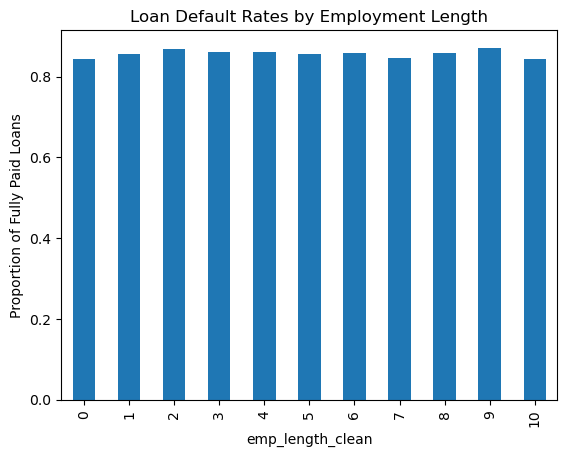

In [41]:
# Group by emp_length
emp_status = df_loan.groupby('emp_length_clean')['loan_status_encoded'].mean()

print(emp_status)

# Plot
import matplotlib.pyplot as plt

emp_status.plot(kind='bar', title='Loan Default Rates by Employment Length')
plt.ylabel('Proportion of Fully Paid Loans')
plt.show()

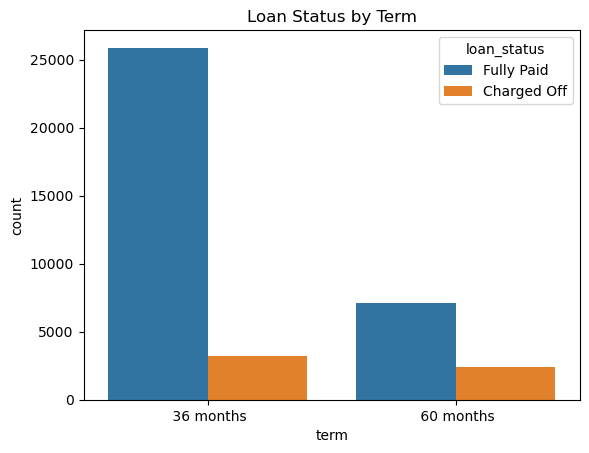

In [42]:
import seaborn as sns

sns.countplot(x='term', hue='loan_status', data=df_loan)
plt.title('Loan Status by Term')
plt.show()

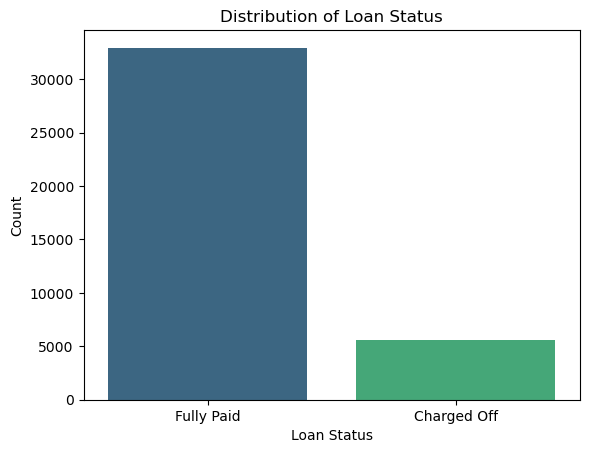

In [43]:
sns.countplot(x='loan_status', data=df_loan, palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

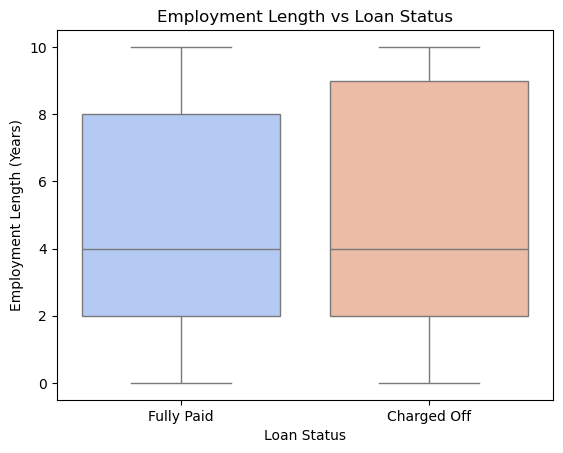

In [44]:
sns.boxplot(x='loan_status', y='emp_length_clean', data=df_loan, palette='coolwarm')
plt.title('Employment Length vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length (Years)')
plt.show()

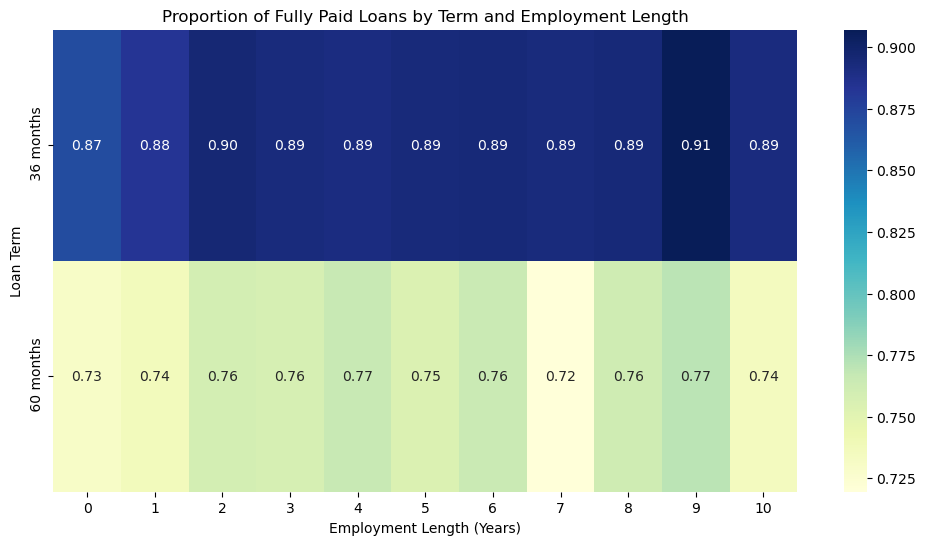

In [45]:
# Group data by term and emp_length_clean
grouped = df_loan.groupby(['term', 'emp_length_clean'])['loan_status_encoded'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(grouped, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Proportion of Fully Paid Loans by Term and Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Loan Term')
plt.show()


We can analyze from the graph above is that it the employment length corelation with Loan term, the chnaces of Loan getting fully- paid is in 36 month and people who have experience between 2-10 years are less defaulters

## How Homeownership effects the loan disbursal

In [46]:
df_loan['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [47]:
df_loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [51]:
# Group by home_ownership and loan_status to get counts
home_ownership_status = df_loan.groupby(['home_ownership', 'loan_status']).size().reset_index(name='count')
pivot_data = home_ownership_status.pivot(index='home_ownership', columns='loan_status', values='count').fillna(0)
# Calculate percentages
percentage_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

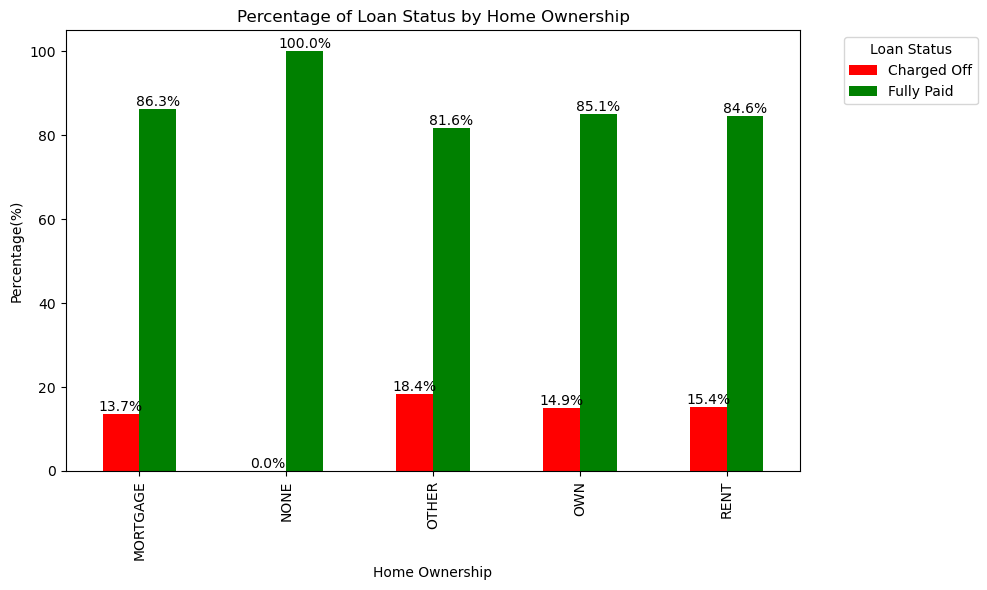

In [61]:
# Define custom colors for the bars
custom_colors = ['red', 'green']  # 'Charged Off' -> red, 'Fully Paid' -> green

# Plot percentage bar chart with custom colors
ax = percentage_data.plot(kind='bar', color=custom_colors, figsize=(10, 6))


# Annotate percentages on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

# Add titles and labels
plt.title('Percentage of Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage(%)')
plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



From the above graph we can conclude that where homeownership is not known the chances of them repaying back the loan is 100% where as where homeownership is mortgage stands second in paying back the loan and people who own their home are third. 

Where as the charged off is higher where the ownership is OTHER and where Homeownership is Rented comes second.

# Lets Analyze the relationship between the purpose of the loan and whether they are repaying it or not

In [62]:
df_loan['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [64]:
df_loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [67]:
# Group by purpose and loan_status to get counts
purpose_status = df_loan.groupby(['purpose', 'loan_status']).size().reset_index(name='count')

# Pivot data to make it suitable for plotting
pivot_data = purpose_status.pivot(index='purpose', columns='loan_status', values='count').fillna(0)

# Calculate percentages
percentage_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

print(percentage_data)

loan_status         Charged Off  Fully Paid
purpose                                    
car                   10.673783   89.326217
credit_card           10.781778   89.218222
debt_consolidation    15.325395   84.674605
educational           17.230769   82.769231
home_improvement      12.069565   87.930435
house                 16.076294   83.923706
major_purchase        10.325581   89.674419
medical               15.565345   84.434655
moving                15.972222   84.027778
other                 16.377749   83.622251
renewable_energy      18.627451   81.372549
small_business        27.080958   72.919042
vacation              14.133333   85.866667
wedding               10.367171   89.632829


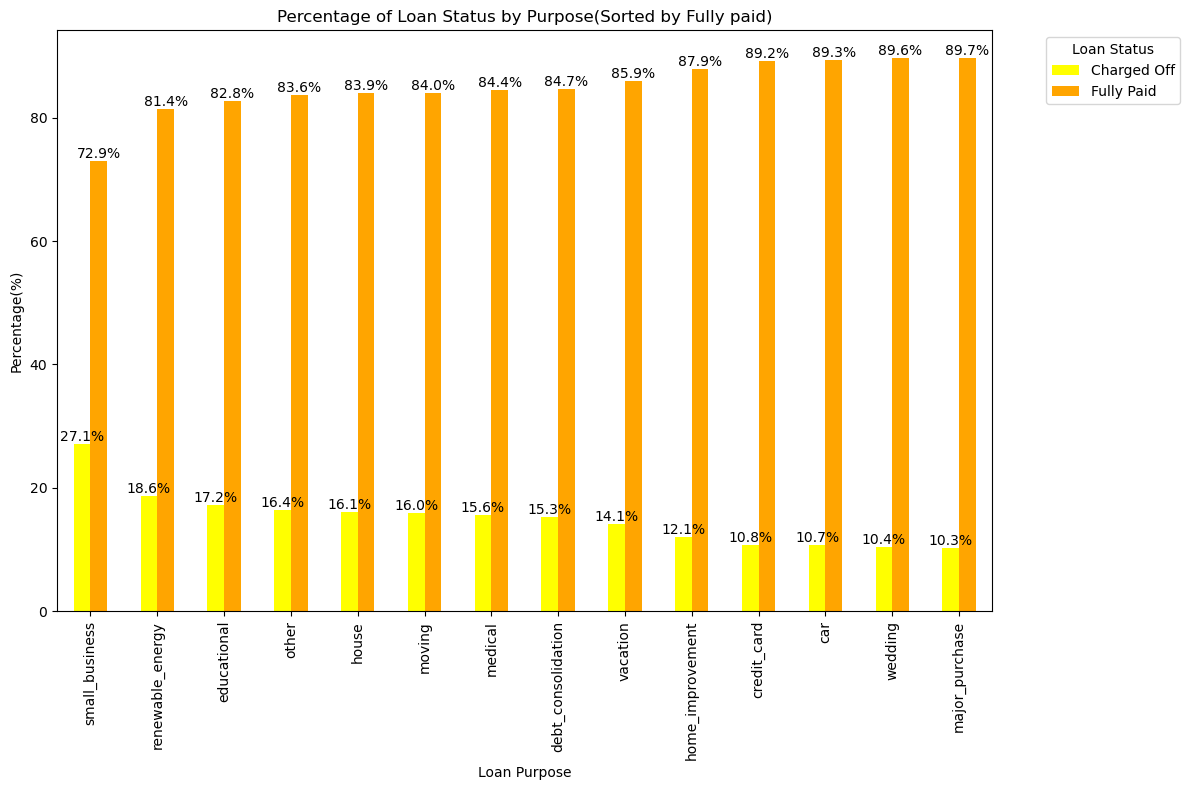

In [73]:
# Define custom colors for the bars
custom_colors = ['yellow', 'orange']  # 'Charged Off' -> yellow, 'Fully Paid' -> orange

sorted_data = percentage_data.sort_values(by='Fully Paid')


# Plot percentage bar chart
ax = sorted_data.plot(kind='bar', color=custom_colors, figsize=(12, 8))

# Annotate percentages on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')


# Add titles and labels
plt.title('Percentage of Loan Status by Purpose(Sorted by Fully paid)')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage(%)')
plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the above graph, we can conclude that chances of repayment is high for Major_purchases compared to others and default of small business is higher.


## Lets understand how much loan is funded as per purpose 

In [75]:
df_loan['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [78]:
df_loan['funded_amnt'].value_counts()

funded_amnt
10000    2719
12000    2161
5000     2017
6000     1876
15000    1732
8000     1556
20000    1368
4000     1120
25000    1080
3000     1010
7000     1005
16000     711
9000      660
14000     575
18000     546
2000      521
35000     499
7500      478
4800      418
2500      402
24000     372
13000     368
7200      347
9600      342
3500      336
11000     300
1000      299
30000     299
1500      292
4500      290
3600      289
6500      260
5500      256
2400      248
8500      242
5600      221
4200      218
8400      217
21000     210
14400     209
6400      204
17000     204
3200      170
22000     150
11200     143
1200      140
2800      123
28000     117
14500     112
12500     111
1800      109
9500      107
12800     105
10800     104
19000     102
24250     100
11500      97
1600       96
7800       87
6250       86
10500      86
17500      84
5400       81
9250       76
10400      73
4750       72
13200      71
2100       71
6800       71
7750       70
6600    

In [80]:
# Aggregate data to calculate the total or average funded amount per purpose
aggregated_data = df_loan.groupby('purpose')['funded_amnt'].mean().reset_index() 
# Sort the data for better visualization
aggregated_data = aggregated_data.sort_values(by='funded_amnt', ascending=False)
print(aggregated_data)

               purpose   funded_amnt
11      small_business  12843.600342
5                house  12404.019074
2   debt_consolidation  12208.406259
1          credit_card  11304.993038
4     home_improvement  10996.660870
13             wedding   9633.180346
10    renewable_energy   8327.696078
7              medical   7974.265786
6       major_purchase   7895.593023
9                other   7762.710220
3          educational   6692.076923
0                  car   6681.404270
8               moving   6423.046875
12            vacation   5332.400000


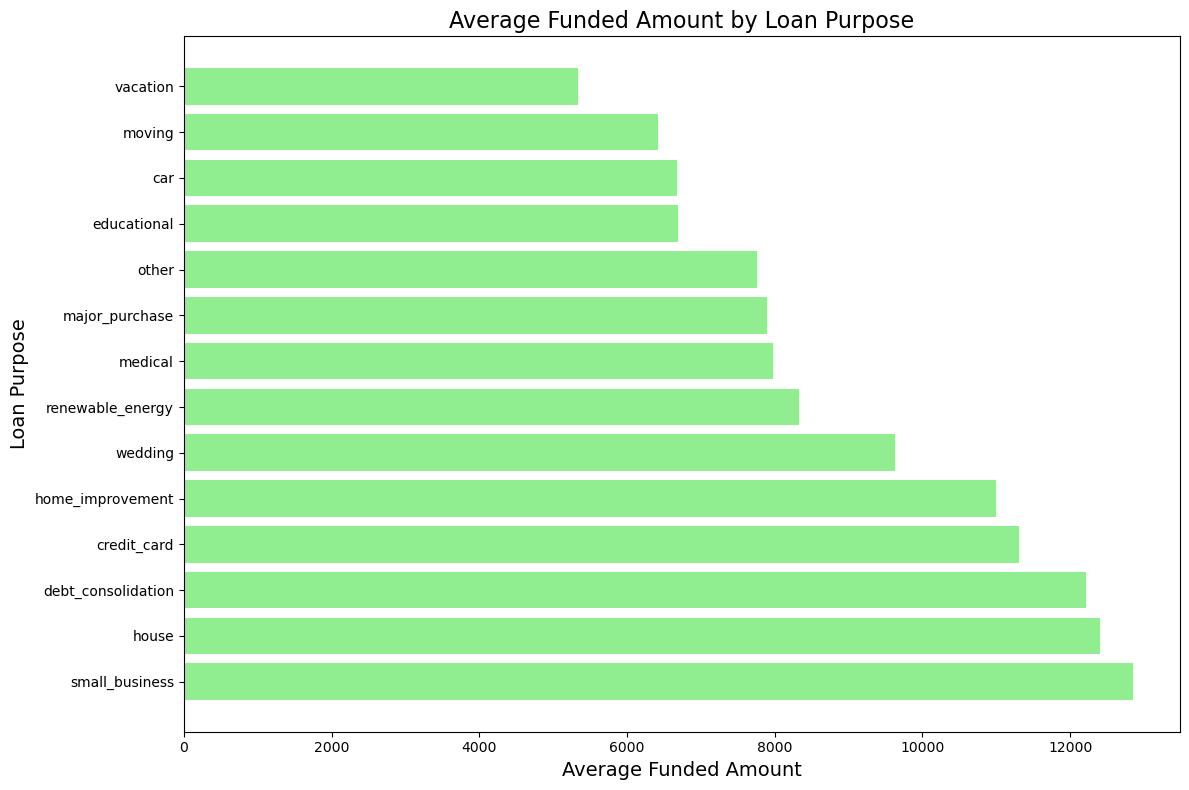

In [82]:
# Horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(aggregated_data['purpose'], aggregated_data['funded_amnt'], color='lightgreen')

# Add labels and title
plt.title('Average Funded Amount by Loan Purpose', fontsize=16)
plt.xlabel('Average Funded Amount', fontsize=14)
plt.ylabel('Loan Purpose', fontsize=14)
plt.tight_layout()
plt.show()

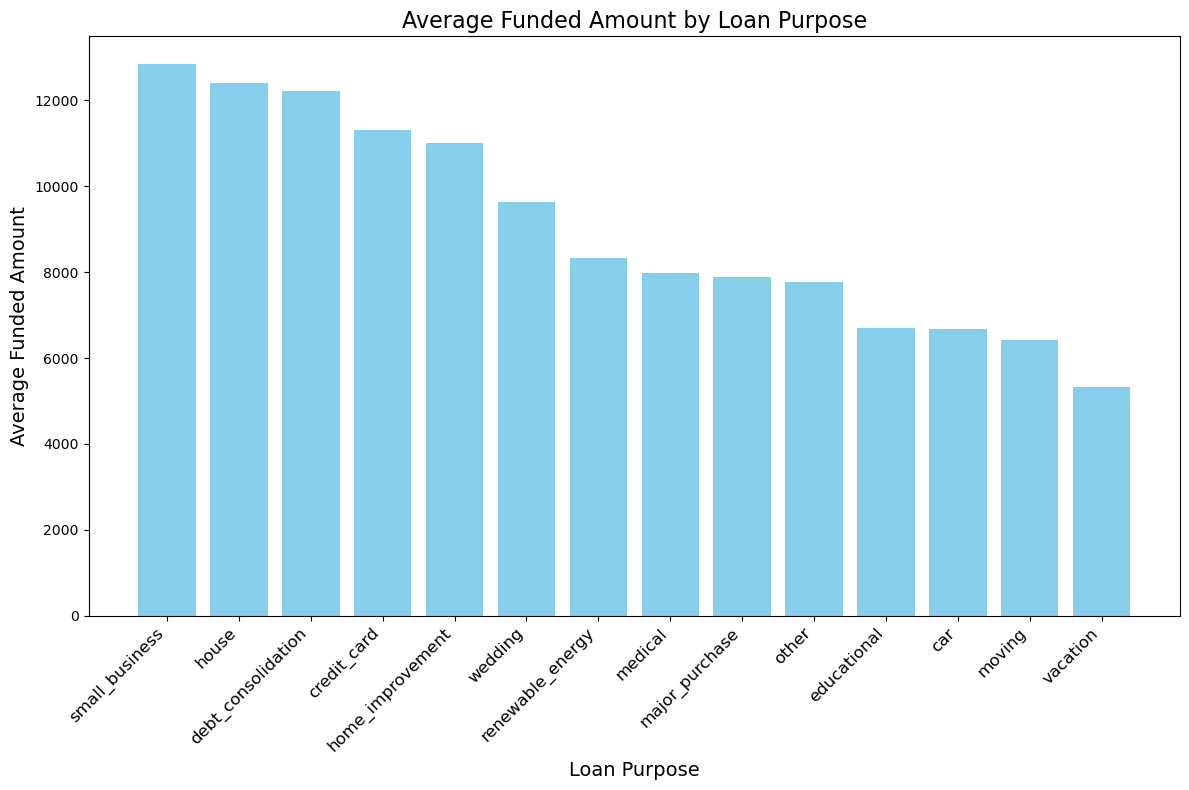

In [84]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(aggregated_data['purpose'], aggregated_data['funded_amnt'], color='skyblue')

# Add labels and title
plt.title('Average Funded Amount by Loan Purpose', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Average Funded Amount', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [92]:
#lets try to create using Sum of funded amount  as well and with a pie chart
# Aggregate data for total funded amount per purpose
aggregated_data = df_loan.groupby('purpose')['funded_amnt'].sum().reset_index()

# Sort the data for better visualization
aggregated_data = aggregated_data.sort_values(by='funded_amnt', ascending=False)
print(aggregated_data)

               purpose  funded_amnt
2   debt_consolidation    220422775
1          credit_card     56830200
4     home_improvement     31615400
9                other     30002875
11      small_business     22527675
6       major_purchase     16975525
0                  car     10015425
13             wedding      8920325
7              medical      5430475
5                house      4552275
8               moving      3699675
3          educational      2174925
12            vacation      1999650
10    renewable_energy       849425


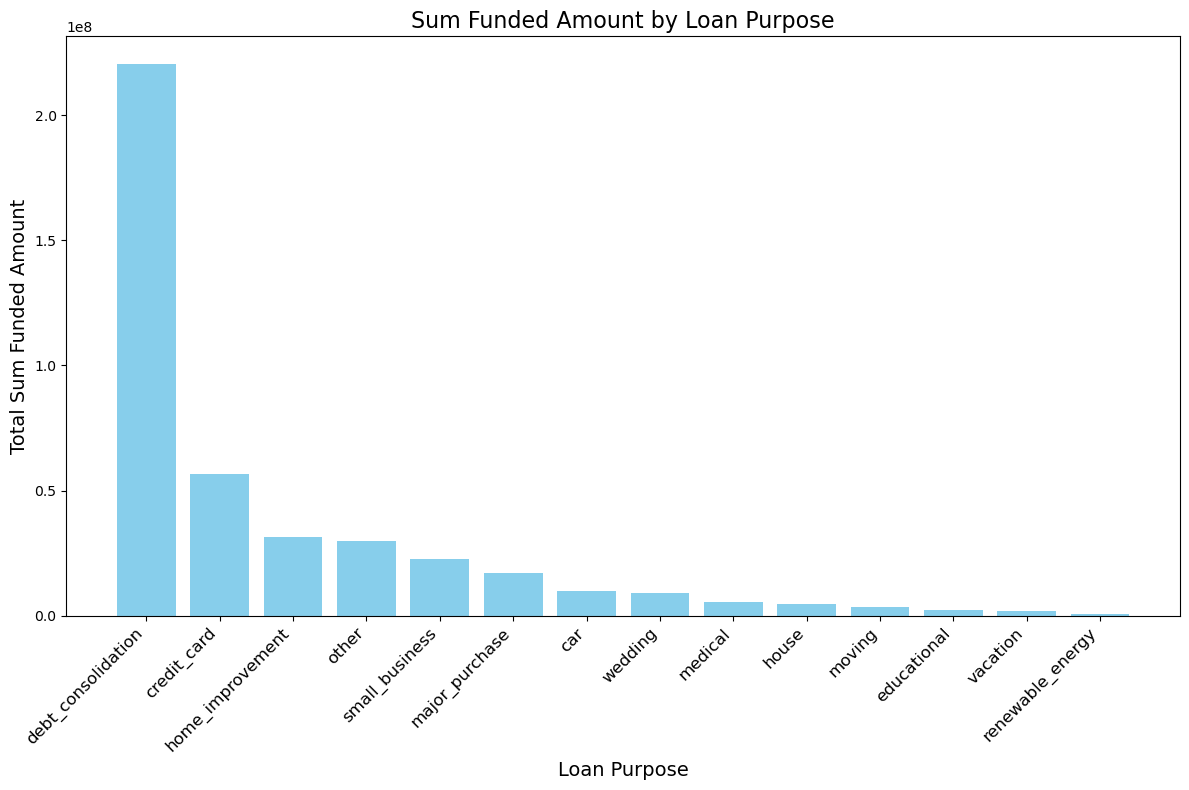

In [95]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(aggregated_data['purpose'], aggregated_data['funded_amnt'], color='skyblue')

# Add labels and title
plt.title('Sum Funded Amount by Loan Purpose', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Total Sum Funded Amount', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

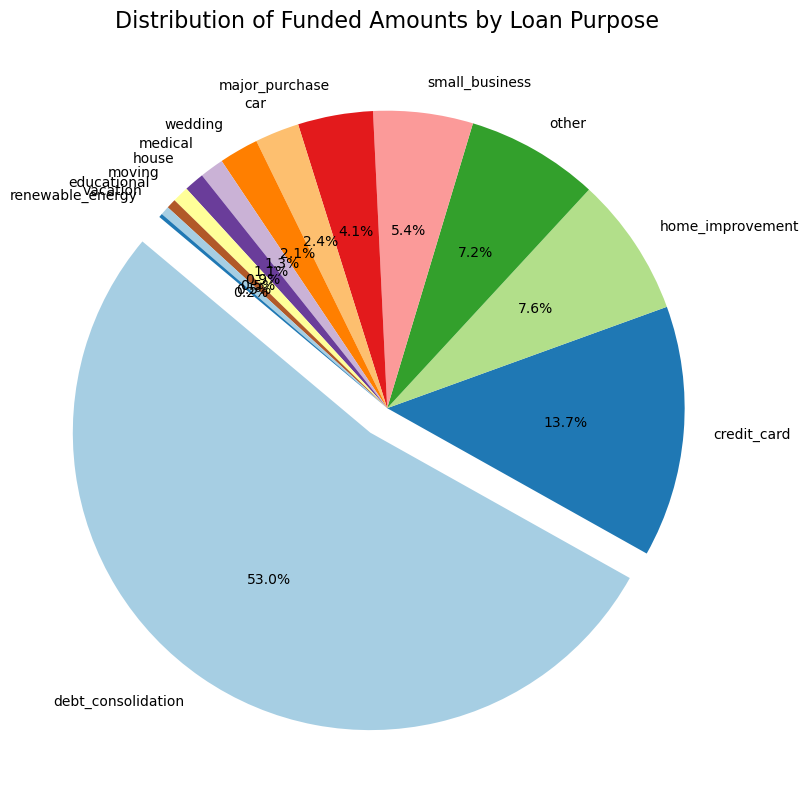

In [96]:
#Pie Chart

# Find the largest segment
explode = [0.1 if i == 0 else 0 for i in range(len(aggregated_data))]  # Explode the first segment

# Create the pie chart with an exploded segment
plt.figure(figsize=(10, 8))
plt.pie(
    aggregated_data['funded_amnt'], 
    labels=aggregated_data['purpose'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode, 
    colors=plt.cm.Paired.colors
)

# Add a title
plt.title('Distribution of Funded Amounts by Loan Purpose', fontsize=16)

# Show the pie chart
plt.tight_layout()
plt.show()


Debt Consolidation Dominates in Total Funded Amount:

When you calculate the sum of funded amounts, debt_consolidation comes out on top because it has the largest number of loans. This indicates that debt consolidation loans are the most common purpose among borrowers.
Small Business Dominates in Average Funded Amount:

When you calculate the average, small_business has the highest funded amount because these loans tend to be larger on an individual basis, even though the number of small business loans is much smaller compared to debt consolidation loans.


Volume vs. Value:

Debt Consolidation: High volume of smaller loans.
Small Business: Fewer loans, but individually larger in size.

Borrower Profile:

Borrowers seeking small_business loans may represent higher-value, targeted funding needs.
Borrowers opting for debt_consolidation likely need smaller amounts for managing existing debts.

## Lets analyze whether employee length relation between purpose of the loan and loan status

In [98]:
df_loan["emp_length"].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [99]:
# Group data by emp_length, purpose, and loan_status to get counts
analysis_data = df_loan.groupby(['emp_length', 'purpose', 'loan_status']).size().reset_index(name='count')

print(analysis_data.head())  # Check the aggregated data

  emp_length             purpose  loan_status  count
0     1 year                 car  Charged Off     17
1     1 year                 car   Fully Paid    119
2     1 year         credit_card  Charged Off     39
3     1 year         credit_card   Fully Paid    422
4     1 year  debt_consolidation  Charged Off    209


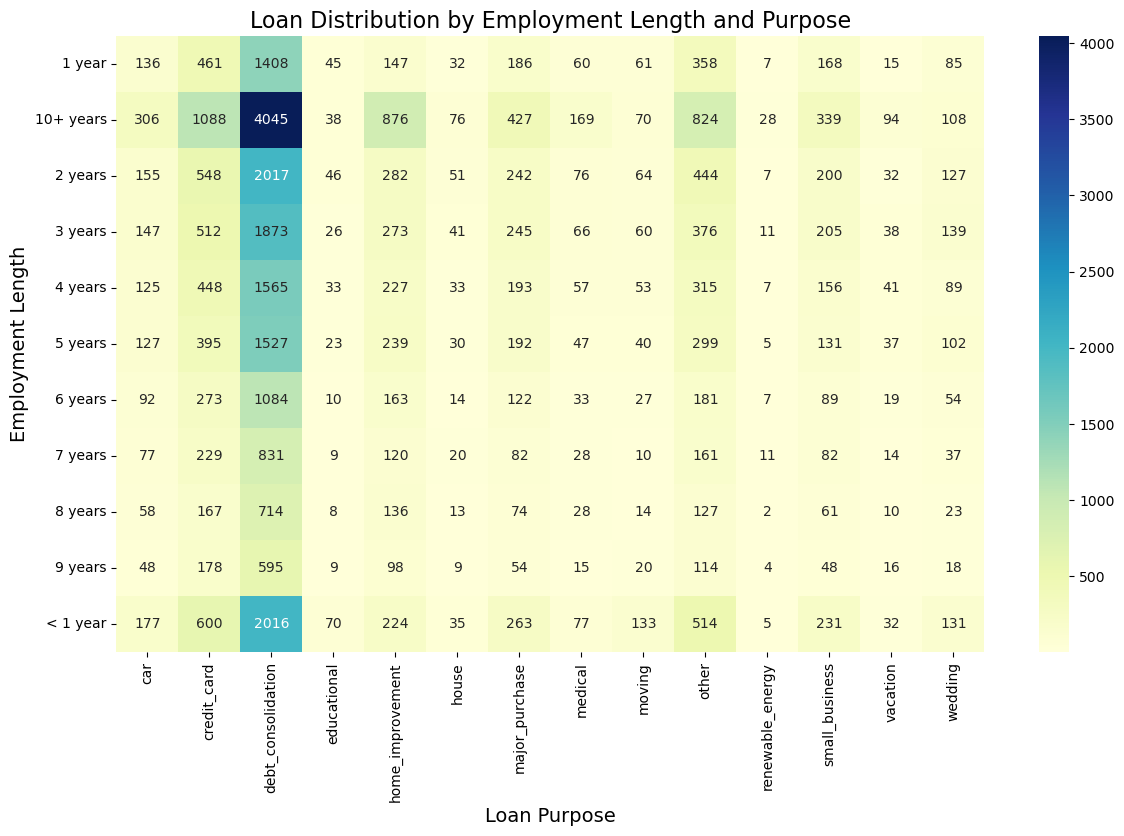

In [100]:
# Pivot the data for heatmap visualization
heatmap_data = analysis_data.pivot_table(
    index='emp_length', 
    columns='purpose', 
    values='count', 
    aggfunc='sum',  # Aggregate counts
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Loan Distribution by Employment Length and Purpose', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Employment Length', fontsize=14)
plt.show()

In [107]:
import pandas as pd

# Group data by emp_length, purpose, and loan_status
analysis_data = df_loan.groupby(['emp_length', 'purpose', 'loan_status']).size().reset_index(name='count')

# Normalize for proportions (optional)
analysis_data['proportion'] = analysis_data.groupby(['emp_length', 'purpose'])['count'].transform(lambda x: x / x.sum())
